### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix

### read data

In [2]:
data = pd.read_csv('Part- 1,2&3 - Signal.csv')
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### shape of the data

In [3]:
data.shape

(1599, 12)

### There are 1599 rows and 12 columns

In [4]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Mean and median are almost similar for all column which indicate that the skewness of the data is very less 

In [5]:
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

### There is no null values present

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### All the columns are of float datatype only

In [7]:
data['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

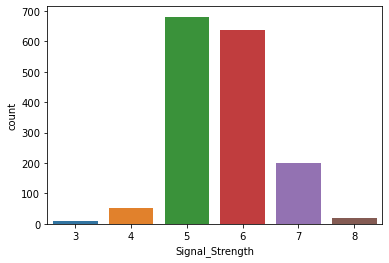

In [8]:
sns.countplot(data['Signal_Strength'])

### There are many values in the values 5 and 6

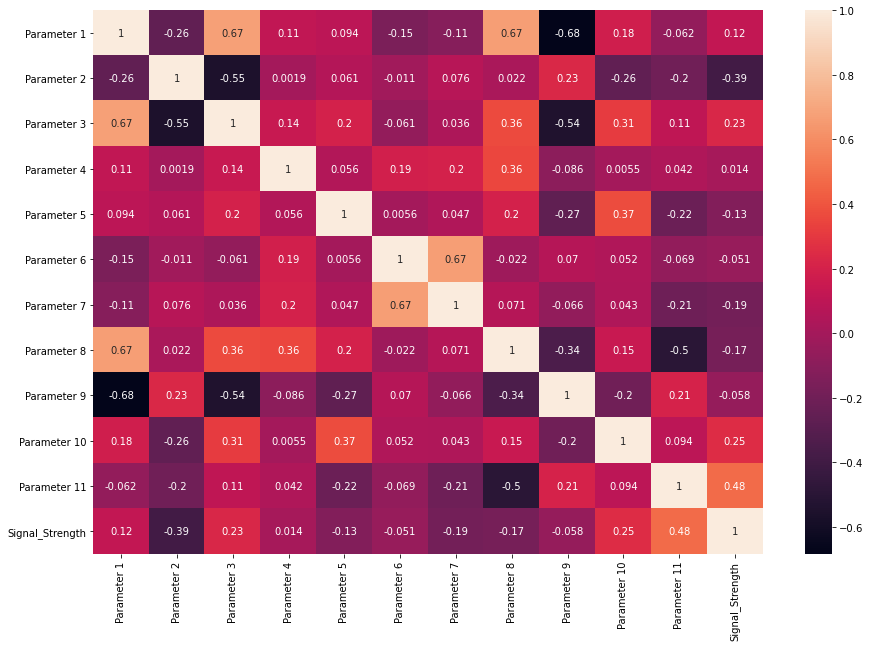

In [9]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

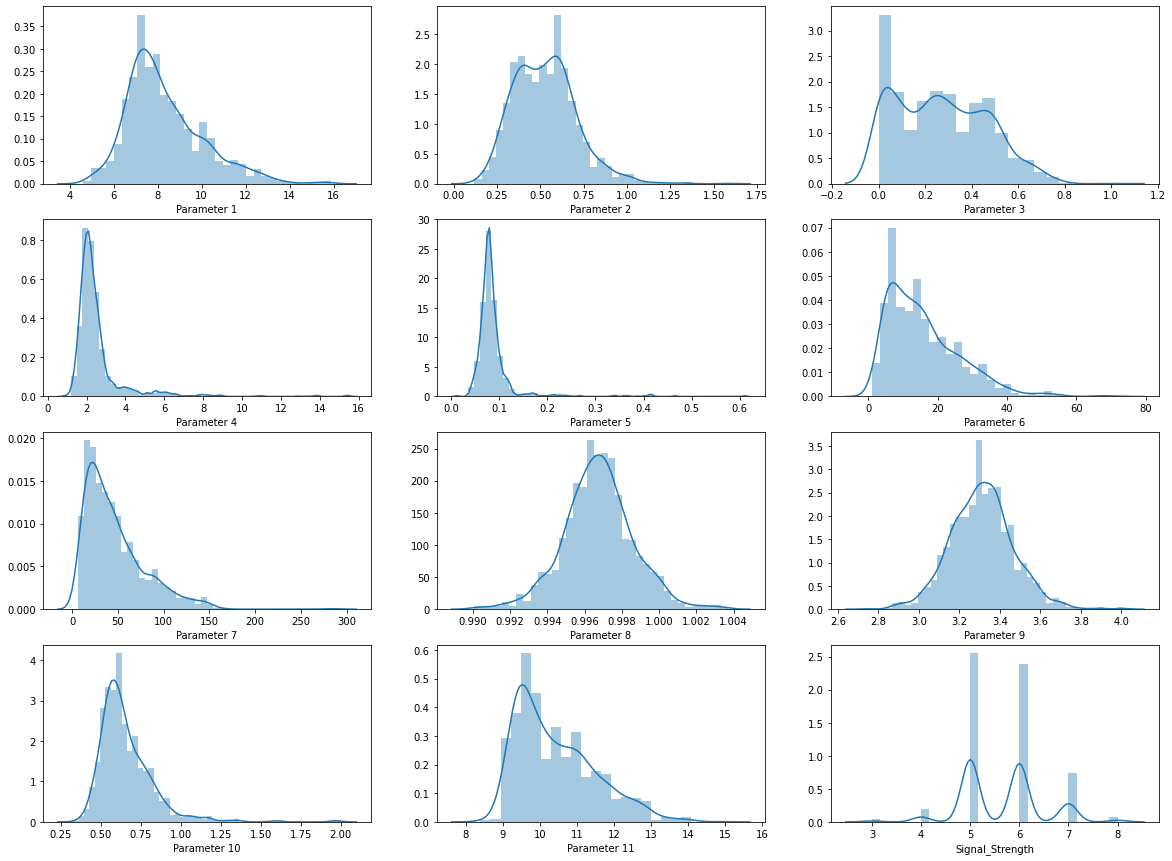

In [10]:
columns = data.columns
ind = 0
rows = 4
cols = 3
fig, ax = plt.subplots(rows, cols, figsize = (20,15))
for r in range(rows):
    for c in range(cols):
        sns.distplot(data[columns[ind]], ax = ax[r][c])
        ind += 1

### There seems to be outlier in parameter 4 and 5

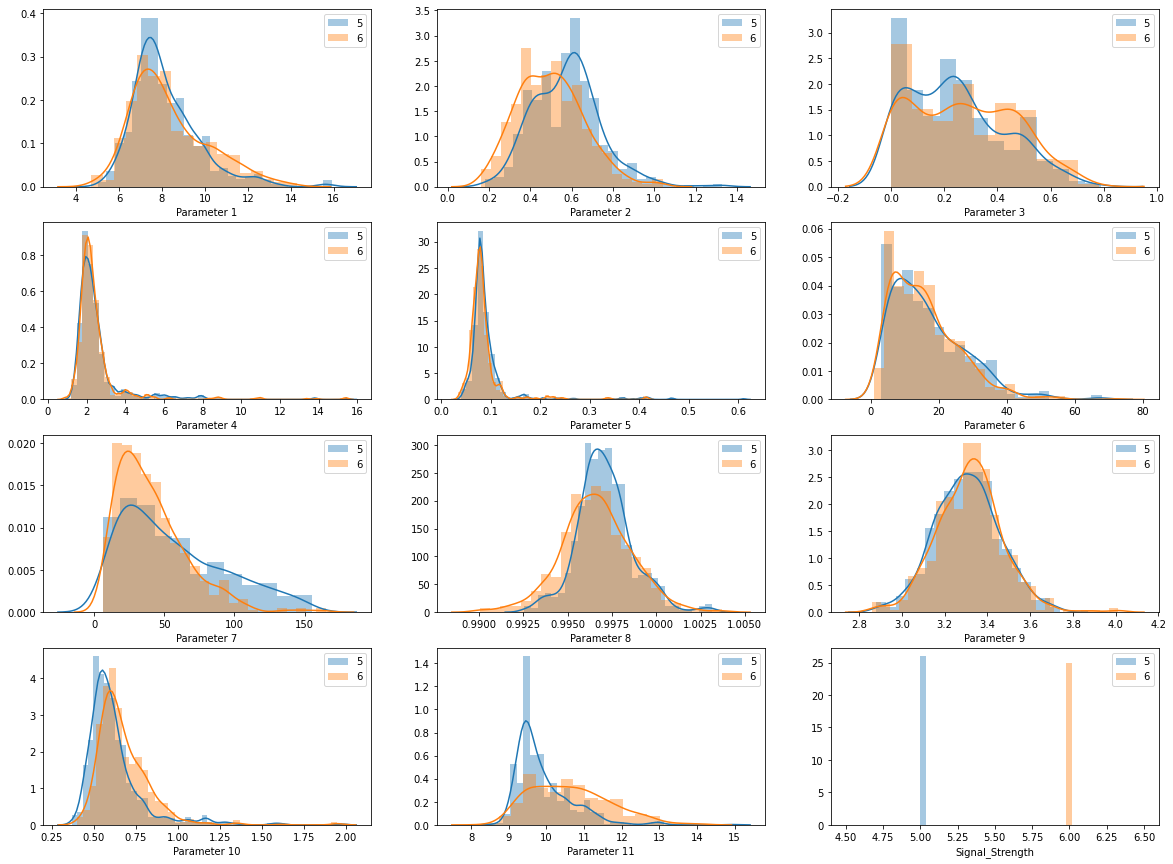

In [11]:
columns = data.columns
ind = 0
rows = 4
cols = 3
fig, ax = plt.subplots(rows, cols, figsize = (20,15))
for r in range(rows):
    for c in range(cols):
        sns.distplot(data[data['Signal_Strength'] == 5][columns[ind]], ax = ax[r][c])
        sns.distplot(data[data['Signal_Strength'] == 6][columns[ind]], ax = ax[r][c])
        ax[r][c].legend(labels=['5', '6'])
        ind += 1

### parameter 4, 5, 6, 9 are almost similar for both 5 and 6 signal strength

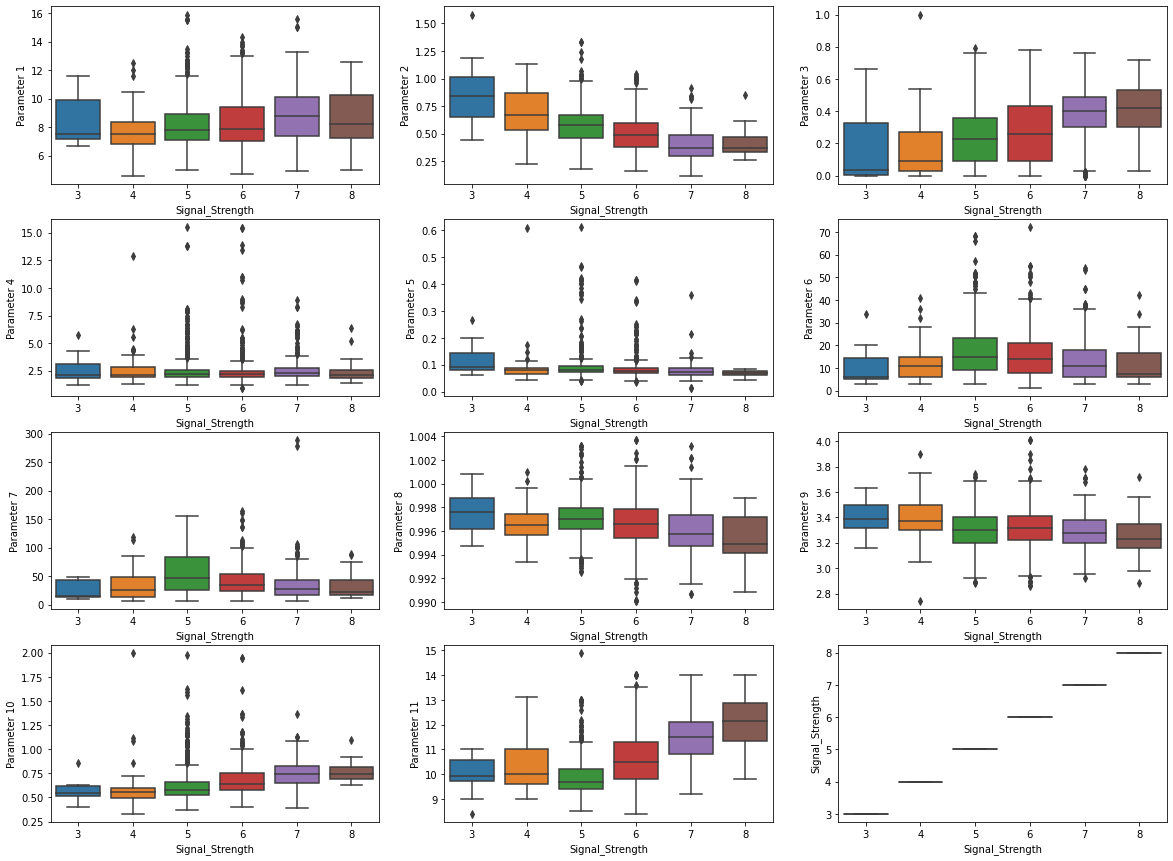

In [12]:
columns = data.columns
ind = 0
rows = 4
cols = 3
fig, ax = plt.subplots(rows, cols, figsize = (20,15))
for r in range(rows):
    for c in range(cols):
        sns.boxplot(data['Signal_Strength'], data[columns[ind]], ax = ax[r][c])
        ind += 1

1. Higher the parameter 2, lower is the signal strength. 
2. Higher the parameter 9, lower is the signal strength. 
3. Higher the parameter 3, higher is the signal strength.
4. Higher the parameter 11, higher is the signal strength.
5. There is no big signal strength variation based on parameter 4, 5, 6, 7.


### outlier treatment

In [13]:
data['Parameter 4 zscore'] = zscore(data['Parameter 4'])
data['Parameter 5 zscore'] = zscore(data['Parameter 5'])

data.loc[(data['Parameter 4 zscore'] > 3) | (data['Parameter 4 zscore'] < -3), 'Parameter 4'] = data['Parameter 4'].median()
data.loc[(data['Parameter 5 zscore'] > 3) | (data['Parameter 5 zscore'] < -3), 'Parameter 5'] = data['Parameter 5'].median()
data.drop(['Parameter 4 zscore', 'Parameter 5 zscore'], axis = 1, inplace = True)

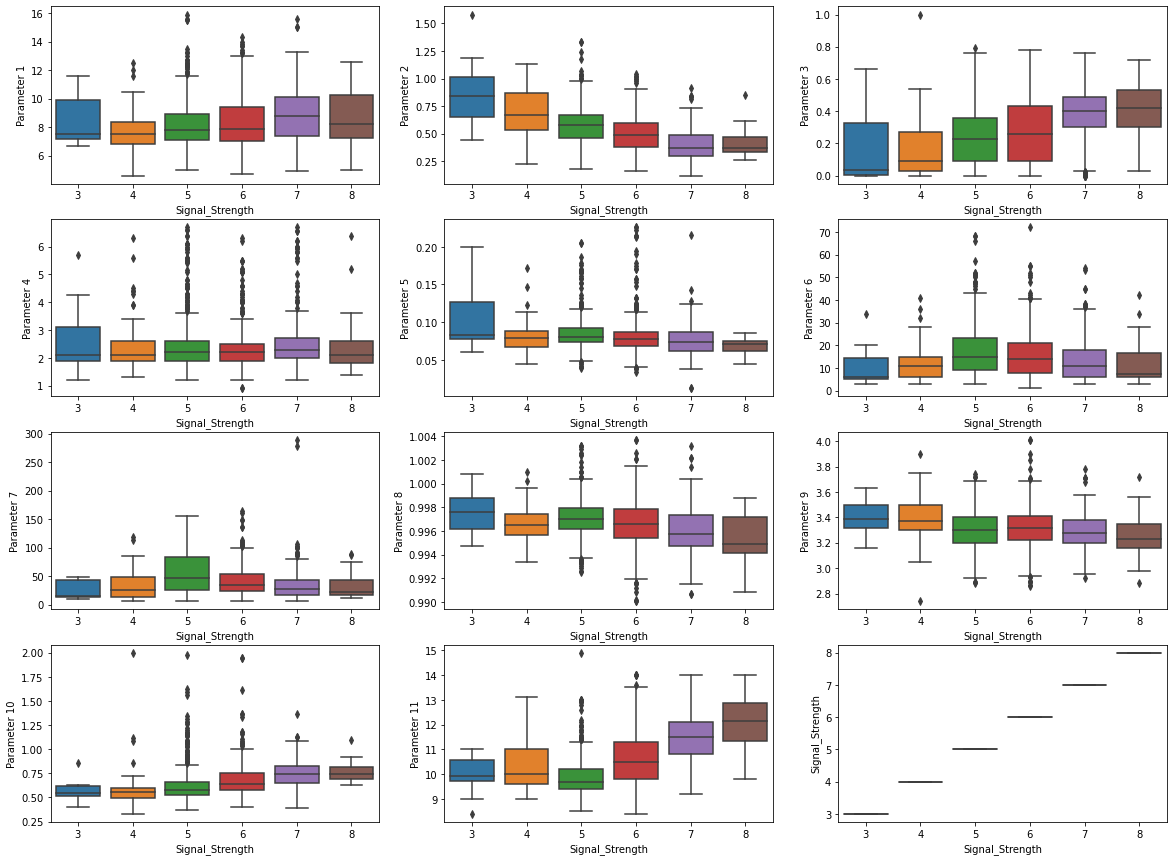

In [14]:
columns = data.columns
ind = 0
rows = 4
cols = 3
fig, ax = plt.subplots(rows, cols, figsize = (20,15))
for r in range(rows):
    for c in range(cols):
        sns.boxplot(data['Signal_Strength'], data[columns[ind]], ax = ax[r][c])
        ind += 1

## Regression

In [15]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
tensorflow.__version__

'2.3.0'

### split train and test

In [16]:
X = data.drop(['Signal_Strength'], axis = 1)
y = data['Signal_Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Scale the data

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Basic NN model

In [18]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = NN_model.fit(X_train, y_train, batch_size=2, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
512/512 [==============================] - 1s 2ms/step - loss: 1.0788 - mean_absolute_error: 1.0788 - val_loss: 0.7912 - val_mean_absolute_error: 0.7912
Epoch 2/30
512/512 [==============================] - 1s 2ms/step - loss: 0.6760 - mean_absolute_error: 0.6760 - val_loss: 0.8118 - val_mean_absolute_error: 0.8118
Epoch 3/30
512/512 [==============================] - 1s 1ms/step - loss: 0.6077 - mean_absolute_error: 0.6077 - val_loss: 0.6370 - val_mean_absolute_error: 0.6370
Epoch 4/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5616 - mean_absolute_error: 0.5616 - val_loss: 0.4985 - val_mean_absolute_error: 0.4985
Epoch 5/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5541 - mean_absolute_error: 0.5541 - val_loss: 0.5359 - val_mean_absolute_error: 0.5359
Epoch 6/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5125 - mean_absolute_error: 0.5125 - val_loss: 0.4718 - val_mean_absolute_error: 0.4718
Epoch 7/30
512/5

### Add batch normalization

In [19]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(BatchNormalization())
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = NN_model.fit(X_train, y_train, batch_size=2, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
512/512 [==============================] - 1s 3ms/step - loss: 2.0141 - mean_absolute_error: 2.0141 - val_loss: 1.4135 - val_mean_absolute_error: 1.4135
Epoch 2/30
512/512 [==============================] - 1s 2ms/step - loss: 1.0169 - mean_absolute_error: 1.0169 - val_loss: 2.8081 - val_mean_absolute_error: 2.8081
Epoch 3/30
512/512 [==============================] - 1s 2ms/step - loss: 0.8787 - mean_absolute_error: 0.8787 - val_loss: 3.3451 - val_mean_absolute_error: 3.3451
Epoch 4/30
512/512 [==============================] - 1s 2ms/step - loss: 0.8619 - mean_absolute_error: 0.8619 - val_loss: 3.3698 - val_mean_absolute_error: 3.3698
Epoch 5/30
512/512 [==============================] - 1s 2ms/step - loss: 0.7980 - mean_absolute_error: 0.7980 - val_loss: 3.3242 - val_mean_absolute_error: 3.3242
Epoch 6/30
512/512 [==============================] - 1s 2ms/step - loss: 0.7756 - mean_absolute_error: 0.7756 - val_loss: 2.3132 - val_mean_absolute_error: 2.3132
Epoch 7/30
512/5

### Add kernel regularizer

In [20]:
Lambda = 3.709855451115318e-07
learning_rate = 0.0007

NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu', kernel_regularizer=regularizers.l2(Lambda)))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu', kernel_regularizer=regularizers.l2(Lambda)))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu', kernel_regularizer=regularizers.l2(Lambda)))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)

NN_model.compile(loss='mean_absolute_error', optimizer=sgd, metrics=['mean_absolute_error'])
history = NN_model.fit(X_train, y_train, batch_size=2, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
512/512 [==============================] - 1s 2ms/step - loss: 2.0075 - mean_absolute_error: 2.0073 - val_loss: 0.6882 - val_mean_absolute_error: 0.6880
Epoch 2/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5490 - mean_absolute_error: 0.5489 - val_loss: 0.5055 - val_mean_absolute_error: 0.5054
Epoch 3/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5130 - mean_absolute_error: 0.5129 - val_loss: 0.4817 - val_mean_absolute_error: 0.4815
Epoch 4/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5009 - mean_absolute_error: 0.5007 - val_loss: 0.5477 - val_mean_absolute_error: 0.5475
Epoch 5/30
512/512 [==============================] - 1s 1ms/step - loss: 0.4975 - mean_absolute_error: 0.4973 - val_loss: 0.4681 - val_mean_absolute_error: 0.4680
Epoch 6/30
512/512 [==============================] - 1s 1ms/step - loss: 0.4747 - mean_absolute_error: 0.4746 - val_loss: 0.5387 - val_mean_absolute_error: 0.5385
Epoch 7/30
512/5

### Add dropout

In [21]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = NN_model.fit(X_train, y_train, batch_size=2, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
512/512 [==============================] - 1s 2ms/step - loss: 1.1741 - mean_absolute_error: 1.1741 - val_loss: 0.6950 - val_mean_absolute_error: 0.6950
Epoch 2/30
512/512 [==============================] - 1s 2ms/step - loss: 0.7147 - mean_absolute_error: 0.7147 - val_loss: 0.8449 - val_mean_absolute_error: 0.8449
Epoch 3/30
512/512 [==============================] - 1s 2ms/step - loss: 0.6183 - mean_absolute_error: 0.6183 - val_loss: 0.6221 - val_mean_absolute_error: 0.6221
Epoch 4/30
512/512 [==============================] - 1s 2ms/step - loss: 0.6253 - mean_absolute_error: 0.6253 - val_loss: 0.5947 - val_mean_absolute_error: 0.5947
Epoch 5/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5699 - mean_absolute_error: 0.5699 - val_loss: 0.4969 - val_mean_absolute_error: 0.4969
Epoch 6/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5725 - mean_absolute_error: 0.5725 - val_loss: 0.4645 - val_mean_absolute_error: 0.4645
Epoch 7/30
512/5

### Final model with the obtained lr and lambda

In [22]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = NN_model.fit(X_train, y_train, batch_size=2, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
512/512 [==============================] - 1s 2ms/step - loss: 1.0643 - mean_absolute_error: 1.0643 - val_loss: 0.6665 - val_mean_absolute_error: 0.6665
Epoch 2/30
512/512 [==============================] - 1s 2ms/step - loss: 0.6393 - mean_absolute_error: 0.6393 - val_loss: 0.6251 - val_mean_absolute_error: 0.6251
Epoch 3/30
512/512 [==============================] - 1s 2ms/step - loss: 0.6085 - mean_absolute_error: 0.6085 - val_loss: 0.5666 - val_mean_absolute_error: 0.5666
Epoch 4/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5444 - mean_absolute_error: 0.5444 - val_loss: 0.5399 - val_mean_absolute_error: 0.5399
Epoch 5/30
512/512 [==============================] - 1s 1ms/step - loss: 0.5146 - mean_absolute_error: 0.5146 - val_loss: 0.5324 - val_mean_absolute_error: 0.5324
Epoch 6/30
512/512 [==============================] - 1s 2ms/step - loss: 0.5159 - mean_absolute_error: 0.5159 - val_loss: 0.5022 - val_mean_absolute_error: 0.5022
Epoch 7/30
512/5

### Save the model into disk

In [23]:
NN_model.save("regression_model")
NN_model.save_weights("weights.h5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: regression_model\assets


In [24]:
from tensorflow import keras
my_model = keras.models.load_model('regression_model')
my_model.load_weights("weights.h5")

### Predict the signal strength

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = my_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = my_model.predict(X_test)
pred = np.round(pred, 0)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.513418986344176
0.6519202405202649


In [26]:
confusion_matrix(pred, y_test)

array([[  0,   0,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0],
       [  1,  10, 102,  35,   3,   0],
       [  0,   2,  36,  96,  17,   1],
       [  0,   0,   1,   3,   9,   1],
       [  0,   0,   0,   0,   1,   0]], dtype=int64)